# Whisper Options

This notebook explores patterns in Whisper options that yield good results in terms of Word Error Rate.

In [1]:
import pandas

df = pandas.read_csv('../docs/output-2024-04-11/report-whisper.csv')
df.head(5)

,run_id,druid,file,language,transcript_language,runtime,wer,mer,wil,wip,hits,substitutions,insertions,deletions,diff,options
0,bb158br2509-whisper-001,bb158br2509,bb158br2509_sl.m4a,en,en,165.593779,0.070419,0.069941,0.090797,0.909203,4242,96,31,192,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
1,bb158br2509-whisper-002,bb158br2509,bb158br2509_sl.m4a,en,en,158.218959,0.070419,0.069941,0.090797,0.909203,4242,96,31,192,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
2,bb158br2509-whisper-003,bb158br2509,bb158br2509_sl.m4a,en,en,143.839573,0.068212,0.067408,0.089311,0.910689,4275,101,54,154,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
3,bb158br2509-whisper-004,bb158br2509,bb158br2509_sl.m4a,en,en,143.844304,0.068212,0.067408,0.089311,0.910689,4275,101,54,154,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."
4,bb158br2509-whisper-005,bb158br2509,bb158br2509_sl.m4a,en,en,169.810724,0.067108,0.066652,0.087696,0.912304,4257,97,31,176,https://sul-dlss.github.io/whisper-pilot/outpu...,"{'model_name': 'medium', 'beam_size': 5, 'pati..."


In [2]:
opts = df.groupby(by=['options']).mean(numeric_only=True).reset_index()
opts = opts.sort_values('wer')
opts[['options', 'wer']].head(5)

,options,wer
9,"{'model_name': 'large', 'beam_size': 5, 'patie...",0.186067
8,"{'model_name': 'large', 'beam_size': 5, 'patie...",0.190634
29,"{'model_name': 'large-v3', 'beam_size': 5, 'pa...",0.192659
4,"{'model_name': 'large', 'beam_size': 10, 'pati...",0.194170
5,"{'model_name': 'large', 'beam_size': 10, 'pati...",0.194170


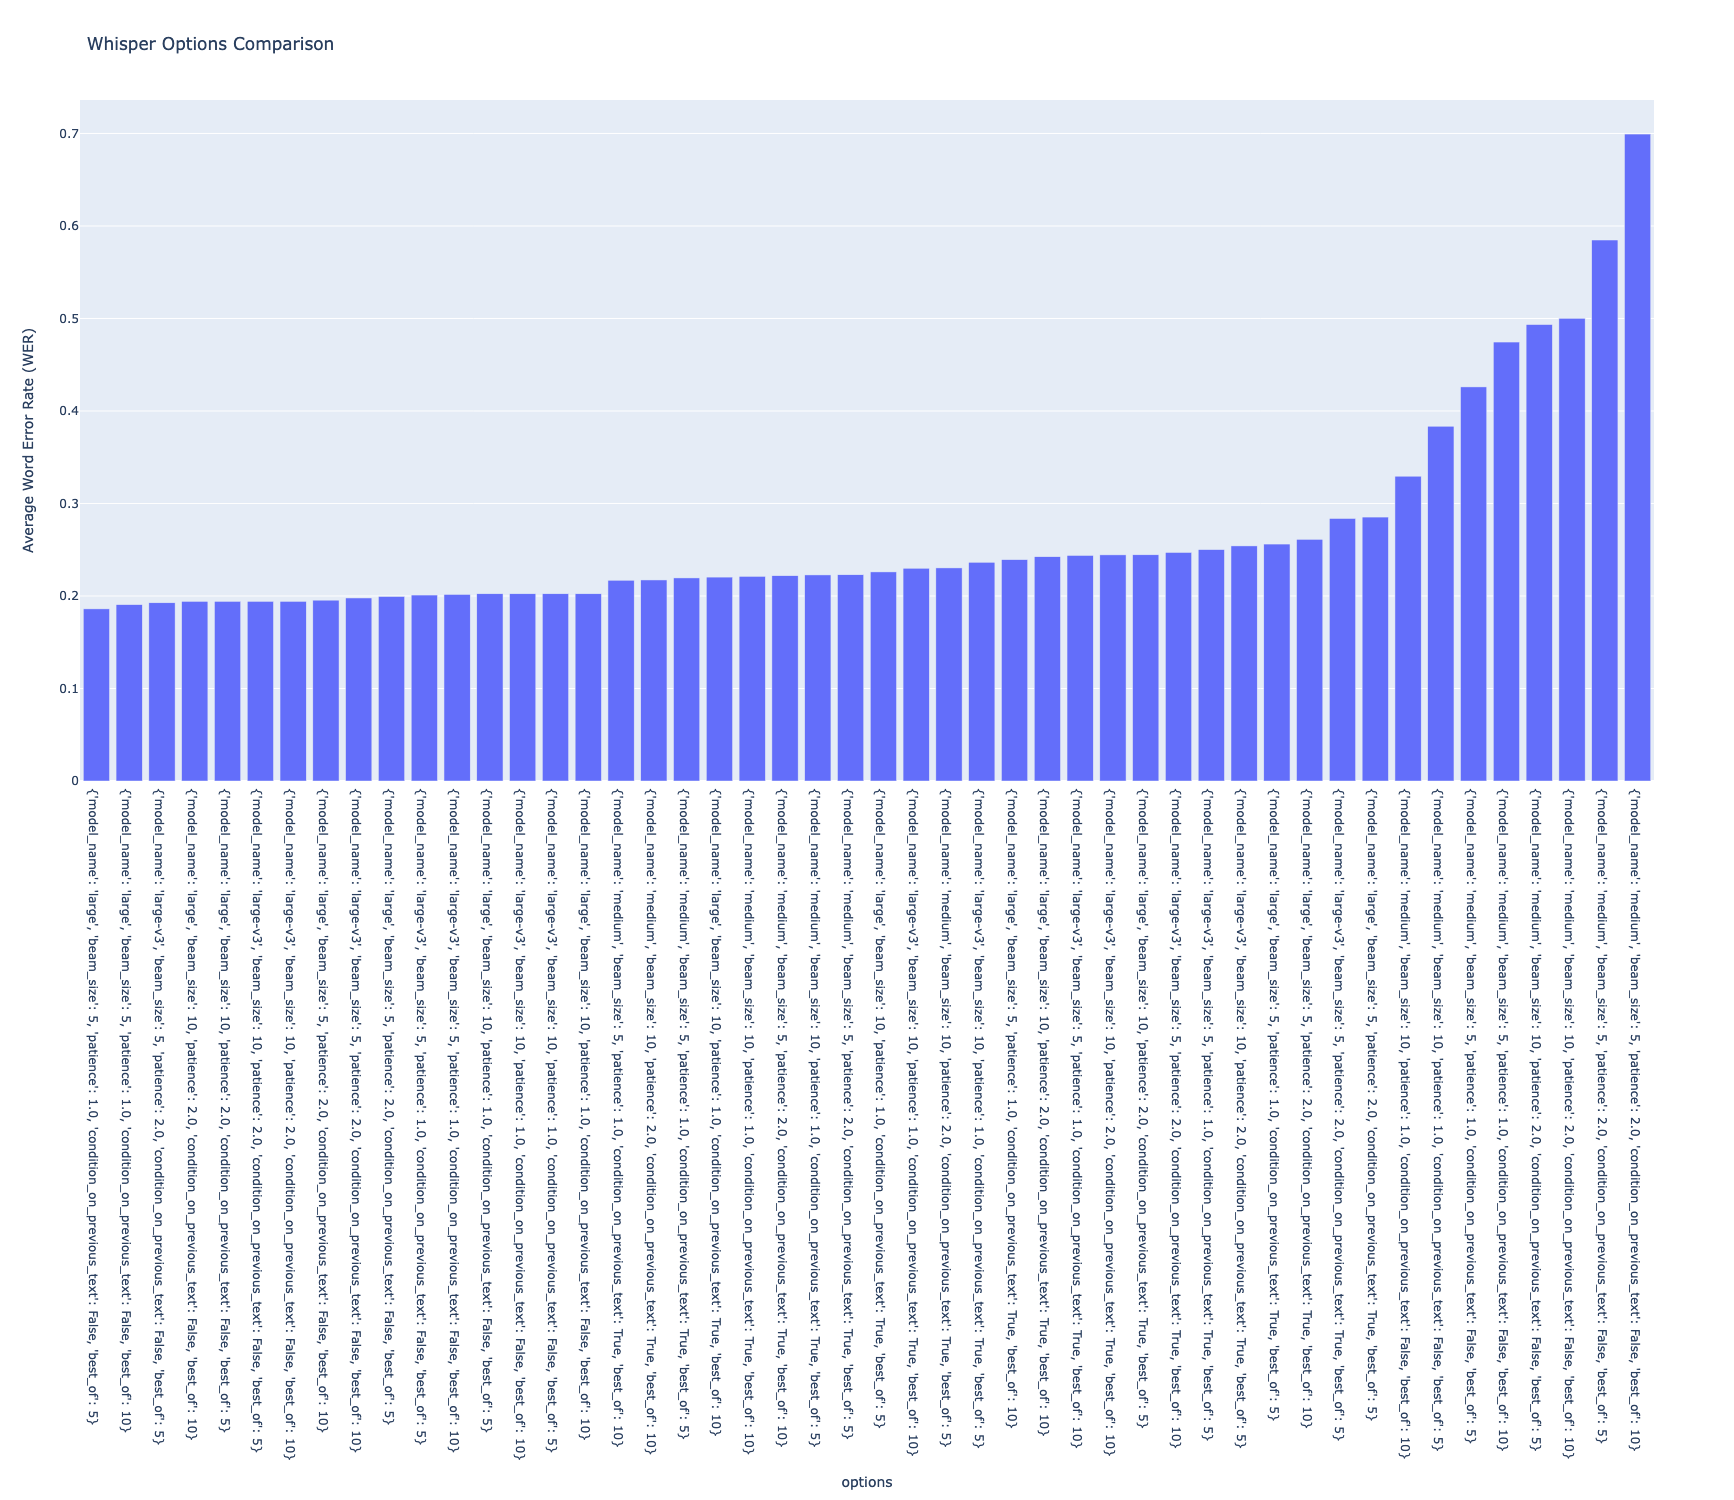

In [18]:
import plotly.express as px

fig = px.bar(opts.set_index('options')['wer'], height=1500, title="Whisper Options Comparison", labels={"value": "Average Word Error Rate (WER)"})
fig.update(layout_showlegend=False)